# Ocean heat uptake assessment

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrcmip.assessed_ranges
import pyrcmip.database
import scmdata
import seaborn as sns
from matplotlib.gridspec import GridSpec
from mock import MagicMock

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/pyrcmip/assessed_ranges.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [4]:
import utils.plotting
import utils.rcmip

<IPython.core.display.Javascript object>

In [5]:
# setup matplotlib to save appropriately
utils.plotting.setup()

<IPython.core.display.Javascript object>

In [6]:
PAPER_DIR = os.path.join("..", "..", "paper")

<IPython.core.display.Javascript object>

In [7]:
ASSESSED_RANGES_CSV = os.path.join(
    "..", "..", "data", "processed", "assessed-ranges", "assessed-ranges.csv"
)
ASSESSED_RANGES_CSV

'../../data/processed/assessed-ranges/assessed-ranges.csv'

<IPython.core.display.Javascript object>

In [8]:
assessed_ranges = utils.rcmip.get_monkey_patched_assessed_ranges(
    pyrcmip.assessed_ranges.AssessedRanges(pd.read_csv(ASSESSED_RANGES_CSV))
)
assessed_ranges.head()

RCMIP name  \
0  Surface Air Ocean Blended Temperature Change W...   
1                    Equilibrium Climate Sensitivity   
2                         Transient Climate Response   
3            Transient Climate Response to Emissions   
4  Effective Radiative Forcing|Anthropogenic|CH4 ...   

                                      RCMIP variable RCMIP region  \
0       Surface Air Ocean Blended Temperature Change        World   
1                                                NaN          NaN   
2                     Surface Air Temperature Change        World   
3  Surface Air Temperature Change,Cumulative Emis...        World   
4      Effective Radiative Forcing|Anthropogenic|CH4        World   

  RCMIP scenario  evaluation_period_start  evaluation_period_end  \
0         ssp245                   2000.0                 2019.0   
1            NaN                      NaN                    NaN   
2        1pctCO2                      NaN                    NaN   
3        1pctCO2                      NaN                    NaN   
4     historical                   2011.0                 2011.0   

   norm_period_start  norm_period_end  very_likely__lower  likely__lower  \
0             1961.0           1990.0            0.462509            NaN   
1                NaN              NaN            2.300000         2.6000   
2                NaN              NaN            0.980000         1.2600   
3                NaN              NaN            1.030000         1.4000   
4             1750.0           1750.0                 NaN         0.4725   

   central  likely__upper  very_likely__upper     unit  \
0   0.5372            NaN            0.613695        K   
1   3.1000         3.9000            4.700000        K   
2   1.6400         2.0200            2.290000        K   
3   1.7700         2.1400            2.510000  K / TtC   
4   0.6000         0.7275                 NaN  W / m^2   

  RCMIP evaluation method                                             Source  
0                    mean                                    HadCRUT.4.6.0.0  
1          model-reported                              Sherwood et al., 2020  
2                  custom    Tokarska et al., 2020 Table S3 Both constrained  
3                  custom                                 Arora et al., 2020  
4                    mean  AR5 WG1 Table 8.SM.6, with extra 25% based on ...

<IPython.core.display.Javascript object>

In [9]:
assessed_ranges.db["RCMIP name"].tolist()

['Surface Air Ocean Blended Temperature Change World ssp245 2000-2019',
 'Equilibrium Climate Sensitivity',
 'Transient Climate Response',
 'Transient Climate Response to Emissions',
 'Effective Radiative Forcing|Anthropogenic|CH4 World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|N2O World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|Montreal Gases World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|F-Gases World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|CO2 World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|Aerosols World historical-1750',
 'Radiative Forcing|Anthropogenic|Tropospheric Ozone World historical-1750',
 'Radiative Forcing|Anthropogenic|Stratospheric Ozone World historical-1750',
 'Radiative Forcing|Anthropogenic|Other|CH4 Oxidation Stratospheric H2O World historical-1750',
 'Radiative Forcing|Anthropogenic|Albedo Change World historical-1750',
 'Radiative Forcing|Anthropogenic|Other|BC

<IPython.core.display.Javascript object>

In [10]:
OUTPUT_DATABASE_DIR = os.path.join(
    "..", "..", "data", "processed", "submission-database"
)
db = pyrcmip.database.Database(OUTPUT_DATABASE_DIR)
db

<utils.scmdata.Database (root_dir: ../../data/processed/submission-database)>

<IPython.core.display.Javascript object>

In [11]:
obs = db.load_data(
    climate_model="vonshuckmann_et_al_2020",
    variable="Heat Content|Ocean*",
    region="World",
    scenario="historical",
)
obs["source"] = "von Schuckmann et al., 2020"
obs["climate_model"] = obs["source"]
obs = obs.drop_meta(
    [
        "cmor_variable",
        "member_id",
        "mip_era",
        "activity_id",
        "variable_standard_name",
    ],
    inplace=False,
)
obs

Loading files:   0%|          | 0/5 [00:00<?, ?it/s]

<scmdata.ScmRun (timeseries: 5, timepoints: 230)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2020-01-01T00:00:00
Meta:
	                 climate_model  ensemble_member           model  \
	0  von Schuckmann et al., 2020                0  not_applicable   
	1  von Schuckmann et al., 2020                0  not_applicable   
	2  von Schuckmann et al., 2020                0  not_applicable   
	3  von Schuckmann et al., 2020                0  not_applicable   
	4  von Schuckmann et al., 2020                0  not_applicable   
	
	   reference_period_end_year  reference_period_start_year region    scenario  \
	0                       1990                         1960  World  historical   
	1                       1990                         1960  World  historical   
	2                       1990                         1960  World  historical   
	3                       1990                         1960  World  historical   
	4                       1990                         1960  World  hi

<IPython.core.display.Javascript object>

In [12]:
obs = (
    obs.filter(variable="Heat Content|Ocean|0-2000m").add(
        obs.filter(variable="Heat Content|Ocean|Below 2000m"),
        op_cols={"variable": "Heat Content|Ocean"},
    )
).convert_unit("ZJ")
obs.head()

time                                                                                                                                                                                    1850-01-01  \
climate_model               ensemble_member model          reference_period_end_year reference_period_start_year region scenario   source                      unit variable                         
von Schuckmann et al., 2020 0               not_applicable 1990                      1960                        World  historical von Schuckmann et al., 2020 ZJ   Heat Content|Ocean         NaN   

time                                                                                                                                                                                    1851-01-01  \
climate_model               ensemble_member model          reference_period_end_year reference_period_start_year region scenario   source                      unit variable                         
von Schuckmann et al., 2020 0               not_applicable 1990                      1960                        World  historical von Schuckmann et al., 2020 ZJ   Heat Content|Ocean         NaN   

time                                                                                                                                                                                    1852-01-01  \
climate_model               ensemble_member model          reference_period_end_year reference_period_start_year region scenario   source                      unit variable                         
von Schuckmann et al., 2020 0               not_applicable 1990                      1960                        World  historical von Schuckmann et al., 2020 ZJ   Heat Content|Ocean         NaN   

time                                                                                                                                                                                    1853-01-01  \
climate_model               ensemble_member model          reference_period_end_year reference_period_start_year region scenario   source                      unit variable                         
von Schuckmann et al., 2020 0               not_applicable 1990                      1960                        World  historical von Schuckmann et al., 2020 ZJ   Heat Content|Ocean         NaN   

time                                                                                                                                                                                    1854-01-01  \
climate_model               ensemble_member model          reference_period_end_year reference_period_start_year region scenario   source                      unit variable                         
von Schuckmann et al., 2020 0               not_applicable 1990                      1960                        World  historical von Schuckmann et al., 2020 ZJ   Heat Content|Ocean         NaN   

time                                                                                                                                                                                    1855-01-01  \
climate_model               ensemble_member model          reference_period_end_year reference_period_start_year region scenario   source                      unit variable                         
von Schuckmann et al., 2020 0               not_applicable 1990                      1960                        World  historical von Schuckmann et al., 2020 ZJ   Heat Content|Ocean         NaN   

time                                                                                                                                                                                    1856-01-01  \
climate_model               ensemble_member model          reference_period_end_year reference_period_start_year region scenario   source                      unit variable                         
von Schuckmann et al., 2020 0     

<IPython.core.display.Javascript object>

Put obs on start of year to make life easy later

In [13]:
obs = obs.time_mean("AS")
obs.head()

time                                                                                                                                                                                    1850-01-01  \
climate_model               ensemble_member model          reference_period_end_year reference_period_start_year region scenario   source                      unit variable                         
von Schuckmann et al., 2020 0               not_applicable 1990                      1960                        World  historical von Schuckmann et al., 2020 ZJ   Heat Content|Ocean         NaN   

time                                                                                                                                                                                    1851-01-01  \
climate_model               ensemble_member model          reference_period_end_year reference_period_start_year region scenario   source                      unit variable                         
von Schuckmann et al., 2020 0               not_applicable 1990                      1960                        World  historical von Schuckmann et al., 2020 ZJ   Heat Content|Ocean         NaN   

time                                                                                                                                                                                    1852-01-01  \
climate_model               ensemble_member model          reference_period_end_year reference_period_start_year region scenario   source                      unit variable                         
von Schuckmann et al., 2020 0               not_applicable 1990                      1960                        World  historical von Schuckmann et al., 2020 ZJ   Heat Content|Ocean         NaN   

time                                                                                                                                                                                    1853-01-01  \
climate_model               ensemble_member model          reference_period_end_year reference_period_start_year region scenario   source                      unit variable                         
von Schuckmann et al., 2020 0               not_applicable 1990                      1960                        World  historical von Schuckmann et al., 2020 ZJ   Heat Content|Ocean         NaN   

time                                                                                                                                                                                    1854-01-01  \
climate_model               ensemble_member model          reference_period_end_year reference_period_start_year region scenario   source                      unit variable                         
von Schuckmann et al., 2020 0               not_applicable 1990                      1960                        World  historical von Schuckmann et al., 2020 ZJ   Heat Content|Ocean         NaN   

time                                                                                                                                                                                    1855-01-01  \
climate_model               ensemble_member model          reference_period_end_year reference_period_start_year region scenario   source                      unit variable                         
von Schuckmann et al., 2020 0               not_applicable 1990                      1960                        World  historical von Schuckmann et al., 2020 ZJ   Heat Content|Ocean         NaN   

time                                                                                                                                                                                    1856-01-01  \
climate_model               ensemble_member model          reference_period_end_year reference_period_start_year region scenario   source                      unit variable                         
von Schuckmann et al., 2020 0     

<IPython.core.display.Javascript object>

In [14]:
ohu_timeseries = (
    scmdata.run_append(
        [
            db.load_data("*", v, "World", "ssp*")
            for v in [
                "Heat Content|Ocean",
            ]
        ]
    )
    .filter(scenario=["*lowNTCF*", "ssp245-*"], keep=False)
    .convert_unit("ZJ")
)
ohu_timeseries

Loading files:   0%|          | 0/65 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


<scmdata.ScmRun (timeseries: 50352, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	      climate_model  ensemble_member        model region scenario unit  \
	0       SCM4OPTv2.1              1.0  unspecified  World   ssp370   ZJ   
	1       SCM4OPTv2.1              2.0  unspecified  World   ssp370   ZJ   
	2       SCM4OPTv2.1              3.0  unspecified  World   ssp370   ZJ   
	3       SCM4OPTv2.1              4.0  unspecified  World   ssp370   ZJ   
	4       SCM4OPTv2.1              5.0  unspecified  World   ssp370   ZJ   
	...             ...              ...          ...    ...      ...  ...   
	50347  MAGICCv7.5.1            595.0  unspecified  World   ssp245   ZJ   
	50348  MAGICCv7.5.1            596.0  unspecified  World   ssp245   ZJ   
	50349  MAGICCv7.5.1            597.0  unspecified  World   ssp245   ZJ   
	50350  MAGICCv7.5.1            598.0  unspecified  World   ssp245   ZJ   
	50351  MAGICCv7.5.1            599.0  unspecified  Wor

<IPython.core.display.Javascript object>

In [15]:
ohu_timeseries.get_unique_meta("scenario")

['ssp370',
 'ssp585',
 'ssp534-over',
 'ssp434',
 'ssp126',
 'ssp119',
 'ssp460',
 'ssp245']

<IPython.core.display.Javascript object>

In [16]:
ohu_timeseries.get_unique_meta("climate_model")

['SCM4OPTv2.1',
 'FaIR1.6',
 'MCE-v1-2',
 'OSCARv3.1',
 'EMGC',
 'Cicero-SCM',
 'MAGICCv7.5.1']

<IPython.core.display.Javascript object>

In [17]:
ohu_timeseries.head()

time                                                                               1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                  
SCM4OPTv2.1   1.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              2.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              3.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              4.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              5.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   

time                                                                               1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                  
SCM4OPTv2.1   1.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              2.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              3.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              4.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              5.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   

time                                                                               1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                  
SCM4OPTv2.1   1.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              2.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              3.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              4.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              5.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   

time                                                                               1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                  
SCM4OPTv2.1   1.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              2.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              3.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              4.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              5.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   

time                                                                               1754-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                  
SCM4OPTv2.1   1.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              2.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              3.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              4.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   
              5.0             unspecified World  ssp370   ZJ   Heat Content|Ocean                  NaN   

time                                                                               1755-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                  
SCM4OPTv2.1   1.0             unspecified World  ssp370   ZJ   Heat Conte

<IPython.core.display.Javascript object>

In [18]:
def remove_pipes_in_axis_labels(ax):
    replace_args = [
        "Heat Content|Ocean",
        "Ocean Heat Content",
    ]
    ax.set_ylabel(ax.get_ylabel().replace(*replace_args))
    ax.set_xlabel(ax.get_xlabel().replace(*replace_args))

    return ax

<IPython.core.display.Javascript object>

Using OSCAR reported data for Heat Content|Ocean World ssp245 1971-2018


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


'../../paper/historical_ocean_heat_content_v_assessment.pdf'

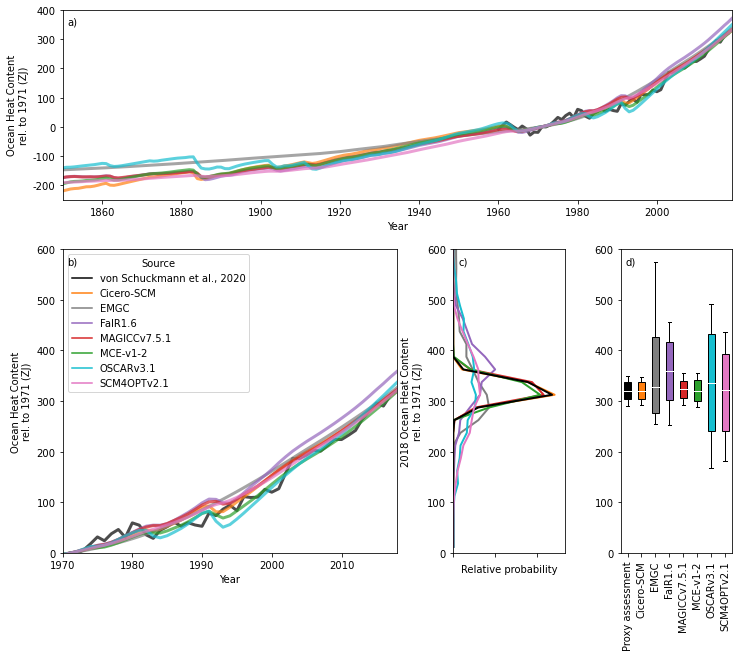

<IPython.core.display.Javascript object>

In [20]:
outfile = os.path.join(PAPER_DIR, "historical_ocean_heat_content_v_assessment.pdf")

fig = plt.figure(figsize=(12, 10))
gs = GridSpec(
    2, 3, width_ratios=[3, 1, 1], height_ratios=[1, 1.6], wspace=0.3, hspace=0.2
)
ax_ts = fig.add_subplot(gs[1, 0])
ax_box = fig.add_subplot(gs[1, 2], sharey=ax_ts)
ax_pdf = fig.add_subplot(gs[1, 1], sharey=ax_ts)
ax_ts_long_same_ref_period = fig.add_subplot(gs[0, :])

plt_years = range(1970, 2018 + 1)
plt_years_long = range(1850, 2019 + 1)
ref_period = range(1971, 1971 + 1)

(
    ax_ts,
    ax_pdf,
    ax_box,
    (ax_ts_long_same_ref_period,),
) = utils.plotting.make_hist_assessed_range_comparison_figure(
    assessed_ranges=assessed_ranges,
    data_scmrun=ohu_timeseries,
    obs=obs,
    variable="*",
    metric="Heat Content|Ocean World ssp245 1971-2018",
    include_assessed_pdf=True,
    quantiles=(0.5,),
    process_over_columns=("ensemble_member",),
    linewidth=3,
    palette=utils.plotting.CLIMATE_MODEL_PALETTE,
    hue="Source",
    scenario="ssp245",
    plt_years=plt_years,
    long_ts_ref_periods_axes_plt_years=(
        (ax_ts_long_same_ref_period, ref_period, plt_years_long),
    ),
    ax_ts=ax_ts,
    ax_pdf=ax_pdf,
    ax_box=ax_box,
    ylim_pdf=[0, 600],
    bins=np.arange(0, 901, 25),
)

for ax in [ax_ts, ax_pdf, ax_ts_long_same_ref_period]:
    ax = remove_pipes_in_axis_labels(ax)

plt.tight_layout()
plt.savefig(outfile, **utils.plotting.SAVE_KWARGS)
outfile